In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import bq_helper # helper functions for putting BigQuery results in Pandas DataFrames
from matplotlib import pyplot as plt # plotting

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [2]:
# create a helper object for our bigquery dataset
bitcoin_blockchain = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", 
                                       dataset_name = "bitcoin_blockchain")
# print a list of all the tables in the hacker_news dataset
bitcoin_blockchain.list_tables()

['blocks', 'transactions']

In [3]:
# print information on all the columns in the "blocks" table
# in the bitcoin_blockchain dataset
bitcoin_blockchain.table_schema("transactions")

[SchemaField('timestamp', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('transaction_id', 'STRING', 'NULLABLE', None, ()),
 SchemaField('inputs', 'RECORD', 'REPEATED', None, (SchemaField('input_script_bytes', 'BYTES', 'NULLABLE', None, ()), SchemaField('input_script_string', 'STRING', 'NULLABLE', None, ()), SchemaField('input_script_string_error', 'STRING', 'NULLABLE', None, ()), SchemaField('input_sequence_number', 'INTEGER', 'NULLABLE', None, ()), SchemaField('input_pubkey_base58', 'STRING', 'NULLABLE', None, ()), SchemaField('input_pubkey_base58_error', 'STRING', 'NULLABLE', None, ()))),
 SchemaField('outputs', 'RECORD', 'REPEATED', None, (SchemaField('output_satoshis', 'INTEGER', 'NULLABLE', None, ()), SchemaField('output_script_bytes', 'BYTES', 'NULLABLE', None, ()), SchemaField('output_script_string', 'STRING', 'NULLABLE', None, ()), SchemaField('output_script_string_error', 'STRING', 'NULLABLE', None, ()), SchemaField('output_pubkey_base58', 'STRING', 'NULLABLE', None, ()), Sch

In [4]:
# preview the first couple lines of the "blocks" table
bitcoin_blockchain.head("transactions")

,timestamp,transaction_id,inputs,outputs,block_id,previous_block,merkle_root,nonce,version,work_terahash,work_error
0,1488040145000,fb31ab50aa936882e8b4a41b068023d3584aa8bf652817...,[{'input_script_bytes': b'H0E\x02!\x00\xbeX8\x...,"[{'output_satoshis': 26975892, 'output_script_...",0000000000000000000261d50ff902034871137e8748f7...,00000000000000000249500b5ac5143f15c88ded7fa8fe...,4d1c1a590d2ce1fb5286419f489dcdf55d5339faf09ece...,1050553231,536870914,18931641524,None
1,1472776292000,1bf438fce6f069c1912a010b17d0f4c0303f4f28d6dd66...,"[{'input_script_bytes': b""H0E\x02!\x00\x90\x0c...","[{'output_satoshis': 524151, 'output_script_by...",000000000000000001b4443ec702e88675fb689dc8848d...,0000000000000000018cde3f6c33e586b9db21b45a8ace...,78b80ad3c8110b39e4be752a52753a3d5e611b1db8cdab...,2229443358,536870912,9481538743,None
2,1492374862000,6e08a2e66e55f80fd255c0cc79944638613138d6705204...,[{'input_script_bytes': b'H0E\x02!\x00\xe5\xf2...,"[{'output_satoshis': 938567, 'output_script_by...",000000000000000000506f6c74e569ab33ef252aadc231...,00000000000000000057f545f49175cf2ca3a746ad5209...,0f72fa69878ad34e02a2afc6559ca26716dc92ff3201b3...,3472499757,536870914,22368906784,None
3,1477326198000,d3d4dd6f5bd6d87dd521d4851eaed495161e584e8c0e73...,[{'input_script_bytes': b'G0D\x02 m@(\x8a\xcf\...,"[{'output_satoshis': 350000, 'output_script_by...",00000000000000000170adbfdacf6c5200cb93ecf629cc...,000000000000000001ab0c8b2b1b34973ec45a96588a0d...,6d3fb05be67a0632583fc8ea08116206d12548d8e37b04...,361808208,536870912,10892986963,None
4,1511252626000,deb8fcb54d28ef9ba53bf18c83f781e90b18f5011428d6...,"[{'input_script_bytes': b""G0D\x02 f\xa3\x98r\x...","[{'output_satoshis': 37798, 'output_script_byt...",00000000000000000080e525cbdded5452da02aaf8a183...,000000000000000000709033a803959fe993468d5655d3...,586ef8f46284245fd15f24ef9ac3dbe19e95d08934e226...,3548032990,536870912,58602376365,None


In [9]:
# preview the first fuve entries in the by column of the blocks table
bitcoin_blockchain.head("transactions", selected_columns="block_id", num_rows=5)

,block_id
0,0000000000000000000261d50ff902034871137e8748f7...
1,000000000000000001b4443ec702e88675fb689dc8848d...
2,000000000000000000506f6c74e569ab33ef252aadc231...
3,00000000000000000170adbfdacf6c5200cb93ecf629cc...
4,00000000000000000080e525cbdded5452da02aaf8a183...


In [6]:
# this query looks in the blocks table in the bitcoin_blockchain
# dataset, then gets the block_id column from every row where 
# the timestamp column is greater than 1288778654000.
query = """SELECT version
            FROM `bigquery-public-data.bitcoin_blockchain.blocks`
            WHERE timestamp > 1515949679000; """

# check how big this query will be
bitcoin_blockchain.estimate_query_size(query)

0.007907122373580933

In [7]:
# only run this query if it's less than 100 MB
recent_version = bitcoin_blockchain.query_to_pandas_safe(query, max_gb_scanned=0.1)

(array([6.4000e+01, 2.0000e+00, 9.0000e+00, 2.6268e+04, 1.0000e+00,
        3.0000e+00, 1.3000e+01, 1.3000e+01, 3.3000e+01, 2.4000e+01]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

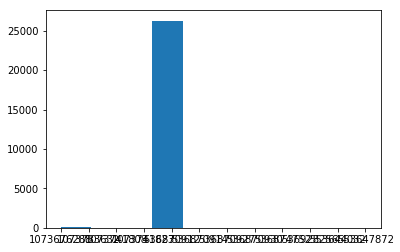

In [8]:
plt.hist(recent_version)